In [1]:
# Import libraries
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

In [2]:
# Load libraries
Bank_data = pd.read_csv("C:/Users/Khanyi/Downloads/bank.csv", delimiter=";")
Bank_data.info()
Bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [3]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
Bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
# Check for missing values and duplicates
print(Bank_data.isnull().sum())
print(Bank_data.duplicated().any())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
False


In [6]:
# Check for unique values
Bank_data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [7]:
# Mapping yes and no values to binary values
Bank_data['default'] = Bank_data['default'].map({'yes': 1, 'no': 0})
Bank_data['housing'] = Bank_data['housing'].map({'yes': 1, 'no':0})
Bank_data['loan'] = Bank_data['loan'].map({'yes': 1, 'no': 0})
Bank_data['y'] = Bank_data['y'].map({'yes': 1, 'no':0})

In [8]:
# Check changes in data
Bank_data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3296,58,blue-collar,married,secondary,0,590,0,1,unknown,5,jun,133,1,-1,0,unknown,0
3751,39,technician,married,secondary,0,116,0,0,cellular,24,aug,79,2,94,2,success,0
220,53,retired,married,tertiary,0,-22,1,0,cellular,31,jul,20,3,-1,0,unknown,0
3675,33,management,single,tertiary,0,349,0,0,cellular,22,aug,182,1,-1,0,unknown,0
581,28,technician,single,secondary,0,227,0,0,cellular,30,apr,278,1,-1,0,unknown,1


In [9]:
# Remove unknown values form dataset
Bank_data.drop(Bank_data[Bank_data['job'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['marital'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['education'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['default'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['housing'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['loan'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['contact'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['poutcome'] == 'unknown'].index, inplace=True)

In [10]:
# check changes in data
Bank_data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,52,services,married,secondary,0,657,0,0,telephone,7,jul,398,2,460,2,failure,1
217,30,blue-collar,married,secondary,0,975,1,0,cellular,13,may,256,2,351,2,failure,0
3869,36,management,divorced,tertiary,0,649,0,0,cellular,16,jul,237,2,91,1,failure,0
2904,39,management,married,tertiary,0,894,1,0,cellular,20,apr,491,1,326,1,other,0
2917,41,technician,single,tertiary,0,1646,1,0,cellular,4,feb,261,1,184,6,success,1


In [11]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind='barh',
                                        stacked=True,
                                        colormap=ListedColormap(sns.color_palette("Set2", n_colors)),
                                        width=0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 10)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

In [12]:
continuous, categorical = [], []
rev_list = ['housing', 'loan', 'default']

for col in [c for c in Bank_data.columns if c not in rev_list and c != 'y']:
    if is_numeric_dtype(Bank_data[col]):
        continuous.append(col)
    else:
        categorical.append(col)

In [13]:
continuous

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
categorical

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Exploratory Data Analysis


In [15]:
n = len(Bank_data)
n_not_subscribed = sum(Bank_data['y'])
n_subscribed = n - n_not_subscribed

print('Dataset contains %d records' % (n))
print('Number of customers who subscribed to a term deposit: %d (%0.2f%%)' % (n_subscribed, n_subscribed*100/n))

Dataset contains 764 records
Number of customers who subscribed to a term deposit: 593 (77.62%)


<AxesSubplot:>

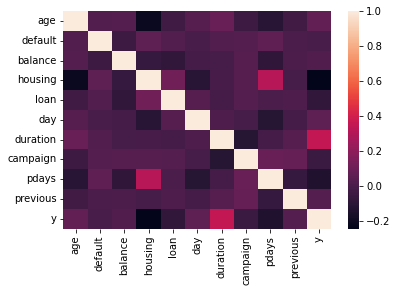

In [16]:
# Correlation matrix
sns.heatmap(Bank_data.corr())

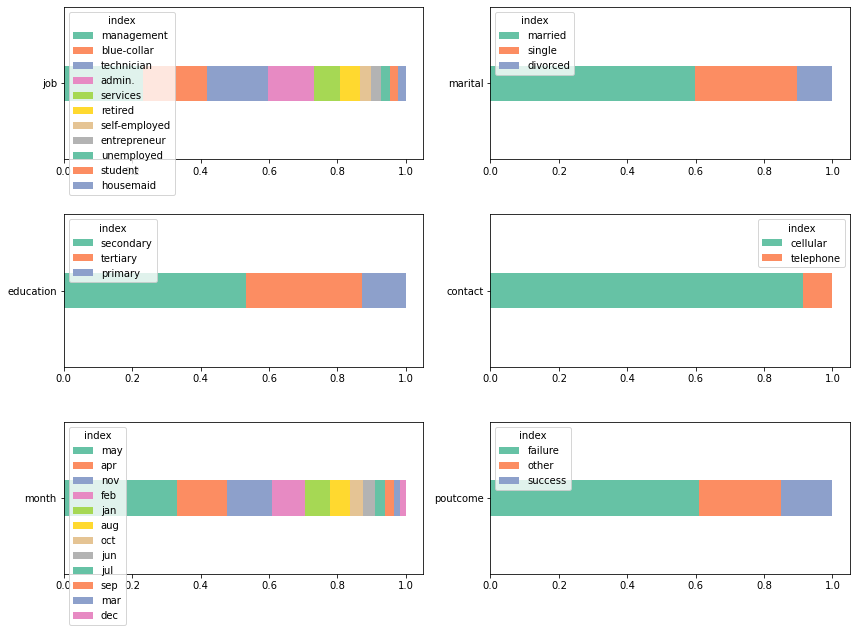

In [17]:
multiple_eda_categorical(Bank_data, categorical)

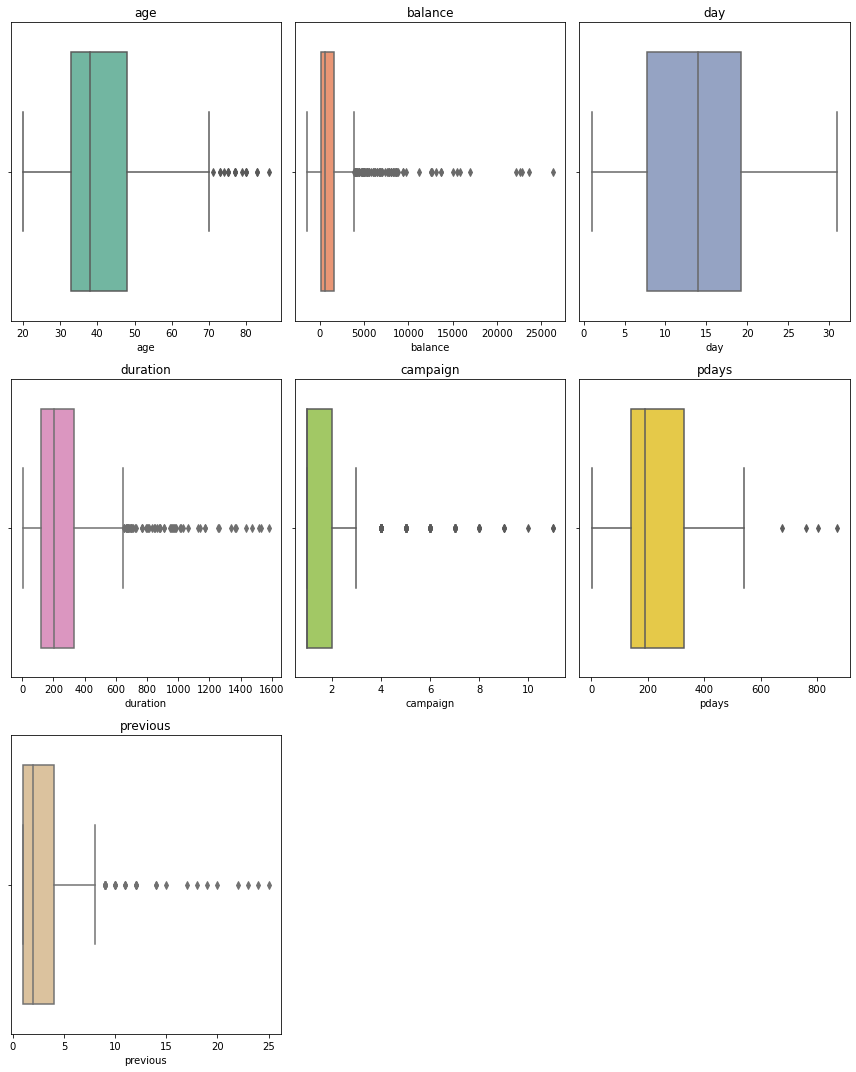

In [18]:
multiple_eda_continuous(Bank_data, continuous)

<AxesSubplot:xlabel='age', ylabel='Count'>

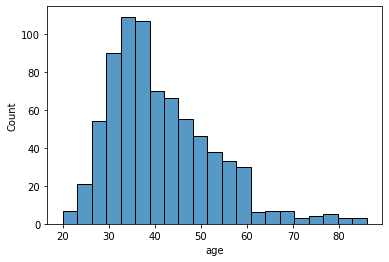

In [19]:
sns.histplot(data=Bank_data, x="age")

<AxesSubplot:xlabel='duration', ylabel='Count'>

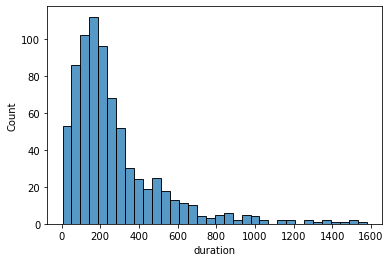

In [20]:
sns.histplot(data=Bank_data, x="duration")

<AxesSubplot:xlabel='day', ylabel='Count'>

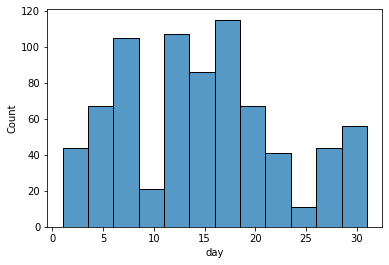

In [21]:
sns.histplot(data=Bank_data, x="day")

<AxesSubplot:xlabel='balance', ylabel='Count'>

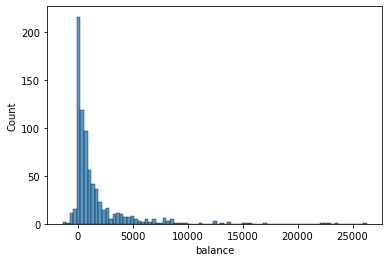

In [22]:
sns.histplot(data=Bank_data, x="balance")

<AxesSubplot:xlabel='campaign', ylabel='Count'>

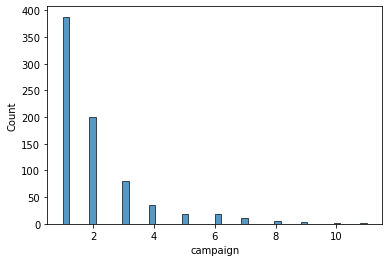

In [23]:
sns.histplot(data=Bank_data, x="campaign")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

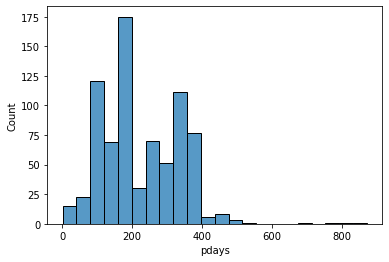

In [24]:
sns.histplot(data=Bank_data, x="pdays")

<AxesSubplot:xlabel='previous', ylabel='Count'>

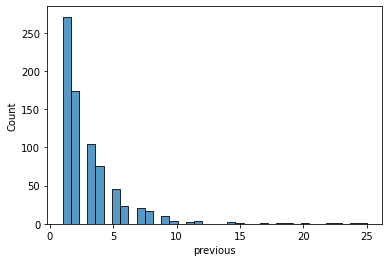

In [25]:
sns.histplot(data=Bank_data, x="previous")

In [26]:
# Check skewness and kurtosis
for i in continuous:
    print(f'skewness {i}:'+ str (Bank_data[i].skew()))
    print(f'kurtosis {i}:' + str(Bank_data[i].kurtosis()))

skewness age:1.0387673109710591
kurtosis age:1.1558727431003812
skewness balance:4.118196818380047
kurtosis balance:22.47192535963755
skewness day:0.2921196558041307
kurtosis day:-0.7463193502678638
skewness duration:2.2222243156579515
kurtosis duration:6.260778768052605
skewness campaign:2.315116889048518
kurtosis campaign:6.311455557122773
skewness pdays:0.7305006090598364
kurtosis pdays:1.884630497342513
skewness previous:3.313444050008051
kurtosis previous:16.198806584233512


# Suggested method for dealing with outliers

In [27]:
# Method 1
# IQR score
Q1 = Bank_data.quantile(0.25)
Q3 = Bank_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Bank_data_out = Bank_data[~((Bank_data < (Q1 - 1.5 * IQR)) |(Bank_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Bank_data_out.shape)

age           15.00
default        0.00
balance     1507.50
housing        1.00
loan           0.00
day           11.50
duration     212.25
campaign       1.00
pdays        189.25
previous       3.00
y              0.00
dtype: float64
(354, 17)


C:\Users\Khanyi\AppData\Local\Temp/ipykernel_8348/2459866011.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Bank_data_out = Bank_data[~((Bank_data < (Q1 - 1.5 * IQR)) |(Bank_data > (Q3 + 1.5 * IQR))).any(axis=1)]


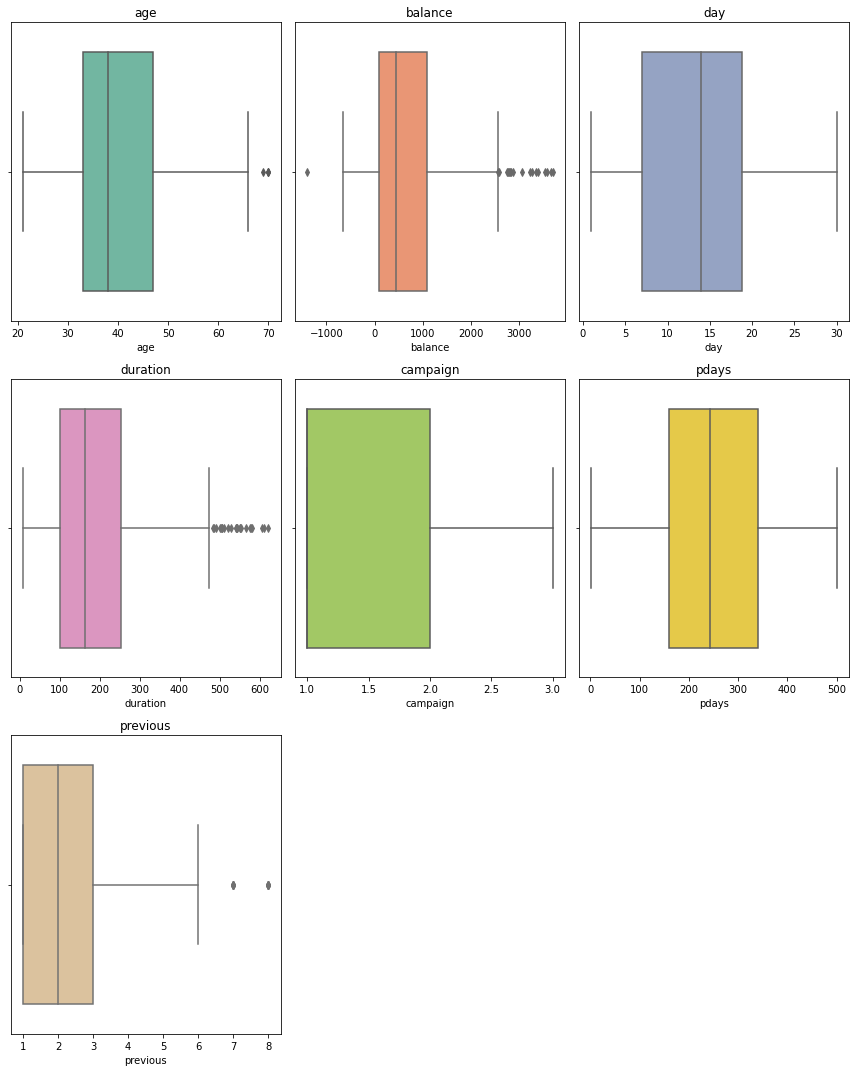

In [28]:
# Check outliers after flooring and capping using IQR
multiple_eda_continuous(Bank_data_out, continuous)

In [29]:
# Compare skewness and kurtosis after transforming dataset with method 1
for i in continuous:
    print(f'skewness {i}:'+ str (Bank_data[i].skew()))
    print(f'skewness {i}:'+ str (Bank_data_out[i].skew()))
    print(f'kurtosis {i}:' + str(Bank_data[i].kurtosis()))
    print(f'kurtosis {i}:' + str(Bank_data_out[i].kurtosis()))
    

skewness age:1.0387673109710591
skewness age:0.7466889077589014
kurtosis age:1.1558727431003812
kurtosis age:-0.012350412667140986
skewness balance:4.118196818380047
skewness balance:1.3599440933581954
kurtosis balance:22.47192535963755
kurtosis balance:1.806331869697361
skewness day:0.2921196558041307
skewness day:0.37819284271588616
kurtosis day:-0.7463193502678638
kurtosis day:-0.607495051527065
skewness duration:2.2222243156579515
skewness duration:1.1479904436792574
kurtosis duration:6.260778768052605
kurtosis duration:0.8459030996344614
skewness campaign:2.315116889048518
skewness campaign:0.9122029779772568
kurtosis campaign:6.311455557122773
kurtosis campaign:-0.3639093544923342
skewness pdays:0.7305006090598364
skewness pdays:-0.18319590806731162
kurtosis pdays:1.884630497342513
kurtosis pdays:-1.0241321515989603
skewness previous:3.313444050008051
skewness previous:1.496318923459939
kurtosis previous:16.198806584233512
kurtosis previous:1.755600914201906


In [30]:
# Method 2
# Binning
Bank_data1 = Bank_data.copy()

# Bin age 
bin_age = ['19-30','31-40','41-50','51-60','60+']
cut_bins = [19,31,41,51,61,87]
Bank_data1['Age group'] = pd.cut(Bank_data['age'], bins=cut_bins, labels=bin_age, include_lowest=True)
                               
# Bin balance
bin_balance = ['Very low','Low','Medium','High']
cut_bins_balance = [-3313,70,445,1481,71188]
Bank_data1['Balance group'] = pd.cut(Bank_data['balance'], bins=cut_bins_balance, labels=bin_balance, include_lowest=True)

# Bin duration
bin_duration = ['short','medium','long']
cut_bins_duration = [4,186,330,3025]
Bank_data1['Duration group'] = pd.cut(Bank_data['duration'], bins=cut_bins_duration, labels=bin_duration, include_lowest=True)

# Bin campaign
bin_campaign = ['1-10','11-20','20+']
cut_bins_campaign = [1,11,21,50]
Bank_data1['Campaign length'] = pd.cut(Bank_data['campaign'], bins=cut_bins_campaign, labels=bin_campaign, include_lowest=True)

Bank_data1.drop(['age', 'balance', 'duration', 'campaign'], axis=1, inplace=True)

In [31]:
Bank_data1.sample(10)

,job,marital,education,default,housing,loan,contact,day,month,pdays,previous,poutcome,y,Age group,Balance group,Duration group,Campaign length
2185,services,married,secondary,0,1,0,cellular,6,may,351,2,failure,0,31-40,Medium,medium,1-10
1518,technician,married,secondary,0,0,0,cellular,20,apr,343,4,failure,0,31-40,Low,short,1-10
3471,blue-collar,married,primary,0,1,0,cellular,14,may,259,17,failure,0,41-50,Medium,short,1-10
814,technician,married,secondary,0,1,0,cellular,4,feb,247,1,other,0,41-50,Very low,short,1-10
3684,admin.,single,tertiary,0,0,0,cellular,30,apr,85,2,success,1,19-30,Low,long,1-10
3951,technician,single,secondary,0,1,0,cellular,17,nov,123,2,failure,0,41-50,Low,medium,1-10
4169,services,divorced,secondary,0,1,0,cellular,14,may,360,1,failure,0,31-40,Low,short,1-10
314,admin.,single,tertiary,0,1,0,cellular,27,may,89,2,failure,1,19-30,Medium,medium,1-10
3236,blue-collar,married,primary,0,1,0,cellular,16,apr,146,9,other,0,41-50,High,medium,1-10
1077,admin.,married,tertiary,0,0,0,cellular,27,mar,130,2,failure,1,31-40,High,short,1-10


# Weight of Evidence (WOE) and Information Value (IV)

In [32]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [33]:
for col in Bank_data.columns:
    if col == 'y': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(Bank_data, col, 'y')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: age


C:\Users\Khanyi\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
19     75    3     1    2    0.001686   0.011696 -1.936678  0.019385
44     80    3     1    2    0.001686   0.011696 -1.936678  0.019385
26     25    5     2    3    0.003373   0.017544 -1.648996  0.023368
55     66    2     1    1    0.001686   0.005848 -1.243531  0.005175
45     83    2     1    1    0.001686   0.005848 -1.243531  0.005175
52     69    2     1    1    0.001686   0.005848 -1.243531  0.005175
47     73    2     1    1    0.001686   0.005848 -1.243531  0.005175
34     77    4     2    2    0.003373   0.011696 -1.243531  0.010350
40     48   11     6    5    0.010118   0.029240 -1.061209  0.020292
33     59   14     8    6    0.013491   0.035088 -0.955849  0.020643
6      55   16    10    6    0.016863   0.035088 -0.732705  0.013353
11     52   14     9    5    0.015177   0.029240 -0.655744  0.009222
35     53   14     9    5    0.015177   0.029240 -0.655744  0.009222
46     24    3     2    1    0.003

C:\Users\Khanyi\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
166    994    2     1    1    0.001686   0.005848 -1.243531  0.005175
27     273    2     1    1    0.001686   0.005848 -1.243531  0.005175
29     462    2     1    1    0.001686   0.005848 -1.243531  0.005175
142    976    2     1    1    0.001686   0.005848 -1.243531  0.005175
351    724    2     1    1    0.001686   0.005848 -1.243531  0.005175
..     ...  ...   ...  ...         ...        ...       ...       ...
214    142    2     2    0    0.003373   0.000000  0.000000  0.000000
215    710    1     0    1    0.000000   0.005848  0.000000 -0.000000
216   1499    1     1    0    0.001686   0.000000  0.000000  0.000000
236    286    1     1    0    0.001686   0.000000  0.000000  0.000000
605   1136    1     1    0    0.001686   0.000000  0.000000  0.000000

[606 rows x 8 columns]
IV score: 0.14


WoE and IV for column: housing
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      0  275   176 

C:\Users\Khanyi\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
95     250    4     1    3    0.001686   0.017544 -2.342143  0.037141
77     262    3     1    2    0.001686   0.011696 -1.936678  0.019385
349    267    3     1    2    0.001686   0.011696 -1.936678  0.019385
131    293    3     1    2    0.001686   0.011696 -1.936678  0.019385
166    330    3     1    2    0.001686   0.011696 -1.936678  0.019385
..     ...  ...   ...  ...         ...        ...       ...       ...
240    130    5     4    1    0.006745   0.005848  0.142764  0.000128
52     199    5     4    1    0.006745   0.005848  0.142764  0.000128
61     164    5     4    1    0.006745   0.005848  0.142764  0.000128
119    239    5     4    1    0.006745   0.005848  0.142764  0.000128
91     159    7     6    1    0.010118   0.005848  0.548229  0.002341

[430 rows x 8 columns]
IV score: 0.39


WoE and IV for column: campaign
    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
9       9    3    

C:\Users\Khanyi\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Khanyi\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
# Varibles which are useful for prediction
from tabulate import tabulate
print(tabulate([['age', 0.34], ['job', 0.16], ['balance', 0.14], ['housing', 0.33], ['duration', 0.39], ['previous', 0.14]], headers=['variable','IV score']))

variable      IV score
----------  ----------
age               0.34
job               0.16
balance           0.14
housing           0.33
duration          0.39
previous          0.14


From IV the predictive power of variables can be determined. IV < 0.02 is not useful for prediction, IV from 0.02 to 0.1 is weak predictive power, IV from 0.1 to 0.3 has medium predictive power, IV from 0.3-0.5 has good predictive power, IV> 0.5 is not considered relable for prediction.